## Knowledge Graph – A Powerful Data Science Technique to Mine Information from Text (with Python code)

https://www.analyticsvidhya.com/blog/2019/10/how-to-build-knowledge-graph-text-using-spacy/


    Knowledge graphs are one of the most fascinating concepts in data science
    Learn how to build a knowledge graph to mine information from Wikipedia pages
    You will be working hands-on in Python to build a knowledge graph using the popular spaCy library


Lionel Messi needs no introduction. Even folks who don’t follow football have heard about the brilliance of one of the greatest players to have graced the sport. Here’s his Wikipedia page:

Quite a lot of information there! We have text, tons of hyperlinks, and even an audio clip. That’s a lot of relevant and potentially useful information on a single page. The possibilities of putting this into a use case are endless.

However, there is a slight problem. This is not an ideal source of data to feed to our machines. Not in its current form anyway.

Can we find a way to make this text data readable for machines? Essentially, can we transform this text data into something that can be used by the machines and also can be interpreted easily by us?

Yes, we can! We can do it with the help of Knowledge Graphs (KG), one of the most fascinating concepts in data science. I have been blown away by the sheer potential and applications of knowledge graphs and I am sure you will as well.


    What is a Knowledge Graph?
    How to Represent Knowledge in a Graph?
        Sentence Segmentation
        Entities Extraction
        Relations Extraction
    Build a Knowledge Graph from Text Data


We can define a graph as a set of nodes and edges.

Let me explain this using an example. If Node A = Putin and Node B = Russia, then it is quite likely that the edge would be “president of”:knowledge graph

Identifying the entities and the relation between them is not a difficult task for us. However, manually building a knowledge graph is not scalable. Nobody is going to go through thousands of documents and extract all the entities and the relations between them!

That’s why machines are more suitable to perform this task as going through even hundreds or thousands of documents is child’s play for them. But then there is another challenge – machines do not understand natural language. This is where Natural Language Processing (NLP) comes into the picture.

To build a knowledge graph from the text, it is important to make our machine understand natural language. This can be done by using NLP techniques such as sentence segmentation, dependency parsing, parts of speech tagging, and entity recognition. Let’s discuss these in a bit more detail.

Sentence Segmentation

The first step in building a knowledge graph is to split the text document or article into sentences. Then, we will shortlist only those sentences in which there is exactly 1 subject and 1 object. Let’s look at a sample text below:

“Indian tennis player Sumit Nagal moved up six places from 135 to a career-best 129 in the latest men’s singles ranking. The 22-year-old recently won the ATP Challenger tournament. He made his Grand Slam debut against Federer in the 2019 US Open. Nagal won the first set.”

Let’s split the paragraph above into sentences:

    Indian tennis player Sumit Nagal moved up six places from 135 to a career-best 129 in the latest men’s singles ranking
    The 22-year-old recently won the ATP Challenger tournament
    He made his Grand Slam debut against Federer in the 2019 US Open
    Nagal won the first set

Out of these four sentences, we will shortlist the second and the fourth sentences because each of them contains 1 subject and 1 object. In the second sentence, “22-year-old” is the subject and the object is “ATP Challenger tournament”. In the fourth sentence, the subject is “Nagal” and “first set” is the object:

The challenge is to make your machine understand the text, especially in the cases of multi-word objects and subjects. For example, extracting the objects in both the sentences above is a bit tricky. Can you think of any method to solve this problem?

Entities Extraction

The extraction of a single word entity from a sentence is not a tough task. We can easily do this with the help of parts of speech (POS) tags. The nouns and the proper nouns would be our entities.

However, when an entity spans across multiple words, then POS tags alone are not sufficient. We need to parse the dependency tree of the sentence. You can read more about dependency parsing in the following article.

    Introduction to Information Extraction using Python and spaCy

https://www.analyticsvidhya.com/blog/2019/09/introduction-information-extraction-python-spacy/?utm_source=blog&utm_medium=how-to-build-knowledge-graph-text-using-spacy

Let’s get the dependency tags for one of the shortlisted sentences. I will use the popular spaCy library for this task:

In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

The ... det
22-year ... npadvmod
- ... punct
old ... nsubj
recently ... advmod
won ... ROOT
ATP ... compound
Challenger ... compound
tournament ... dobj
. ... punct


The subject (nsubj) in this sentence as per the dependency parser is “old”. That is not the desired entity. We wanted to extract “22-year-old” instead.

The dependency tag of “22-year” is amod which means it is a modifier of “old”. Hence, we should define a rule to extract such entities.

The rule can be something like this — extract the subject/object along with its modifiers and also extract the punctuation marks between them.

But then look at the object (dobj) in the sentence. It is just “tournament” instead of “ATP Challenger tournament”. Here, we don’t have the modifiers but compound words.

Compound words are those words that collectively form a new term with a different meaning. Therefore, we can update the above rule to ⁠— extract the subject/object along with its modifiers, compound words and also extract the punctuation marks between them.

In short, we will use dependency parsing to extract entities.

Extract Relations

Entity extraction is half the job done. To build a knowledge graph, we need edges to connect the nodes (entities) to one another. These edges are the relations between a pair of nodes.

Let’s go back to the example in the last section. We shortlisted a couple of sentences to build a knowledge graph:

Can you guess the relation between the subject and the object in these two sentences?

Both sentences have the same relation – “won”. Let’s see how these relations can be extracted. We will again use dependency parsing:

In [2]:
doc = nlp("Nagal won the first set.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

Nagal ... nsubj
won ... ROOT
the ... det
first ... amod
set ... dobj
. ... punct


To extract the relation, we have to find the ROOT of the sentence (which is also the verb of the sentence). Hence, the relation extracted from this sentence would be “won”.

Finally, the knowledge graph from these two sentences will be like this:

Build a Knowledge Graph from Text Data

Time to get our hands on some code! Let’s fire up our Jupyter Notebooks (or whatever IDE you prefer).

We will build a knowledge graph from scratch by using the text from a set of movies and films related to Wikipedia articles. I have already extracted around 4,300 sentences from over 500 Wikipedia articles. Each of these sentences contains exactly two entities – one subject and one object. You can download these sentences from here.

I suggest using Google Colab for this implementation to speed up the computation time.

In [3]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [4]:
candidate_sentences = pd.read_csv("wiki_sentences_v2.csv")
candidate_sentences.shape

(4318, 1)

In [5]:
candidate_sentences['sentence'].sample(5)

591                      the film was released on february 12, 2016.
2653                                      but we had a bad timeslot.
4265                          and hardee's, helped sponsor the film.
1306    freeman sometimes simply refused to do the additional takes.
3755                     by the 1970s, most movies were color films.
Name: sentence, dtype: object

Let’s check the subject and object of one of these sentences. Ideally, there should be one subject and one object in the sentence:

In [6]:
doc = nlp("color photography became more common from the mid-20th century")

for tok in doc:
  print(tok.text, "...", tok.dep_)

color ... compound
photography ... nsubj
became ... ROOT
more ... advmod
common ... acomp
from ... prep
the ... det
mid-20th ... nummod
century ... pobj


Entity Pairs Extraction

To build a knowledge graph, the most important things are the nodes and the edges between them.

These nodes are going to be the entities that are present in the Wikipedia sentences. Edges are the relationships connecting these entities to one another. We will extract these elements in an unsupervised manner, i.e., we will use the grammar of the sentences.

The main idea is to go through a sentence and extract the subject and the object as and when they are encountered. However, there are a few challenges ⁠— an entity can span across multiple words, eg., “red wine”, and the dependency parsers tag only the individual words as subjects or objects.

So, I have created a function below to extract the subject and the object (entities) from a sentence while also overcoming the challenges mentioned above. I have partitioned the code into multiple chunks for your convenience:

In [7]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

Let me explain the code chunks in the function above:

Chunk 1

I have defined a few empty variables in this chunk. prv_tok_dep and prv_tok_text will hold the dependency tag of the previous word in the sentence and that previous word itself, respectively. prefix and modifier will hold the text that is associated with the subject or the object.

Chunk 2

Next, we will loop through the tokens in the sentence. We will first check if the token is a punctuation mark or not. If yes, then we will ignore it and move on to the next token. If the token is a part of a compound word (dependency tag = “compound”), we will keep it in the prefix variable. A compound word is a combination of multiple words linked to form a word with a new meaning (example – “Football Stadium”, “animal lover”).

As and when we come across a subject or an object in the sentence, we will add this prefix to it. We will do the same thing with the modifier words, such as “nice shirt”, “big house”, etc.

Chunk 3

Here, if the token is the subject, then it will be captured as the first entity in the ent1 variable. Variables such as prefix, modifier, prv_tok_dep, and prv_tok_text will be reset.

Chunk 4

Here, if the token is the object, then it will be captured as the second entity in the ent2 variable. Variables such as prefix, modifier, prv_tok_dep, and prv_tok_text will again be reset.

Chunk 5

Once we have captured the subject and the object in the sentence, we will update the previous token and its dependency tag.

Let’s test this function on a sentence:

In [8]:
get_entities("the film had 200 patents")

['film', '200  patents']

Great, it seems to be working as planned. In the above sentence, ‘film’ is the subject and ‘200 patents’ is the object.

Now we can use this function to extract these entity pairs for all the sentences in our data:

In [9]:
entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 4318/4318 [01:12<00:00, 59.50it/s]


The list entity_pairs contains all the subject-object pairs from the Wikipedia sentences. Let’s have a look at a few of them:

In [10]:
entity_pairs[10:20]

[['we', 'tests'],
 ['m global', 'international sales rights'],
 ['robbie robertson', 'soundtrack'],
 ['it', 'original music tracks'],
 ['it', 'reviewed  franchise'],
 ['she', 'accidentally  mystique'],
 ['', 'military  arrest'],
 ['train', 'vuk'],
 ['telepath', 'gallio'],
 ['singer', 'men']]

As you can see, there are a few pronouns in these entity pairs such as ‘we’, ‘it’, ‘she’, etc. We’d like to have proper nouns or nouns instead. Perhaps we can further improve the get_entities( ) function to filter out pronouns. For the time being, let’s leave it as it is and move on to the relation extraction part.

Relation / Predicate Extraction

This is going to be a very interesting aspect of this article. Our hypothesis is that the predicate is actually the main verb in a sentence.

For example, in the sentence – “Sixty Hollywood musicals were released in 1929”, the verb is “released in” and this is what we are going to use as the predicate for the triple generated from this sentence.

The function below is capable of capturing such predicates from the sentences. Here, I have used spaCy’s rule-based matching:

In [11]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

The pattern defined in the function tries to find the ROOT word or the main verb in the sentence. Once the ROOT is identified, then the pattern checks whether it is followed by a preposition (‘prep’) or an agent word. If yes, then it is added to the ROOT word.
Let me show you a glimpse of this function:

In [12]:
get_relation("John completed the task")

'completed'

Similarly, let’s get the relations from all the Wikipedia sentences:

In [13]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

100%|██████████| 4318/4318 [00:57<00:00, 75.02it/s]


Let’s take a look at the most frequent relations or predicates that we have just extracted:

In [14]:
pd.Series(relations).value_counts()[:50]

is               370
was              297
released on       87
include           73
were              71
are               71
released          40
's                38
composed by       35
became            31
has               31
have              31
become            29
released in       27
included          26
produced          22
called            22
considered        20
made              20
had               20
be                18
been              18
scheduled         17
used              17
directed by       16
stars             16
written by        15
produced by       14
wrote             14
set               14
hired             14
introduced in     13
went              13
received          13
wanted            12
won               11
began in          11
began             11
sold              10
features          10
gave              10
known as           9
reported           9
includes           9
shot in            9
directed           9
produced in        9
gives        

It turns out that relations like “A is B” and “A was B” are the most common relations. However, there are quite a few relations that are more associated with the overall theme – “the ecosystem around movies”. Some of the examples are “composed by”, “released in”, “produced”, “written by” and a few more.

Build a Knowledge Graph

We will finally create a knowledge graph from the extracted entities (subject-object pairs) and the predicates (relation between entities).

Let’s create a dataframe of entities and predicates:

In [15]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

Next, we will use the networkx library to create a network from this dataframe. The nodes will represent the entities and the edges or connections between the nodes will represent the relations between the nodes.
It is going to be a directed graph. In other words, the relation between any connected node pair is not two-way, it is only from one node to another. For example, “John eats pasta”:

In [16]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True,create_using=nx.MultiDiGraph())

Let’s plot the network:

So, it’s advisable to use only a few important relations to visualize a graph. I will take one relation at a time. Let’s start with the relation “composed by”:

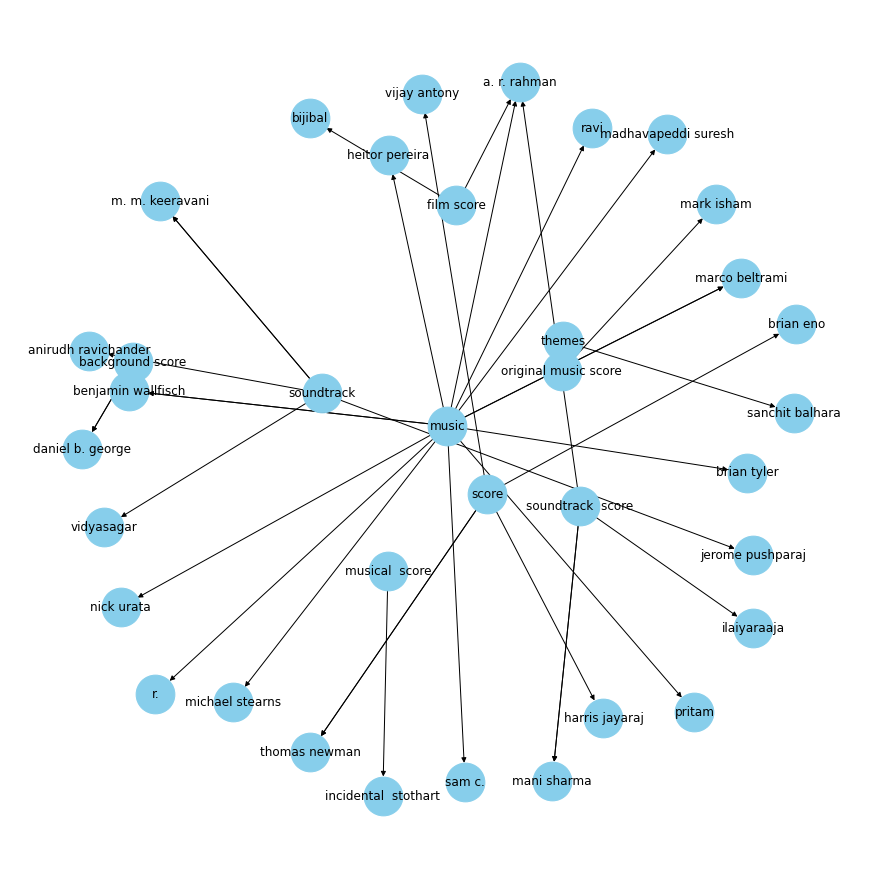

In [17]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

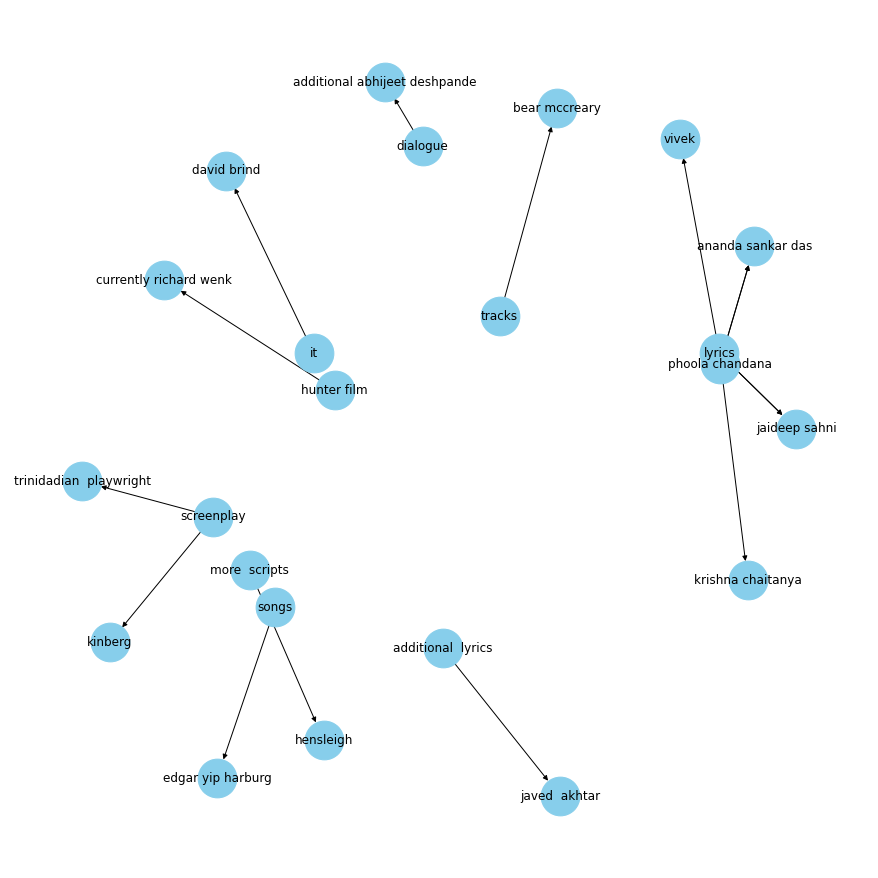

In [18]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

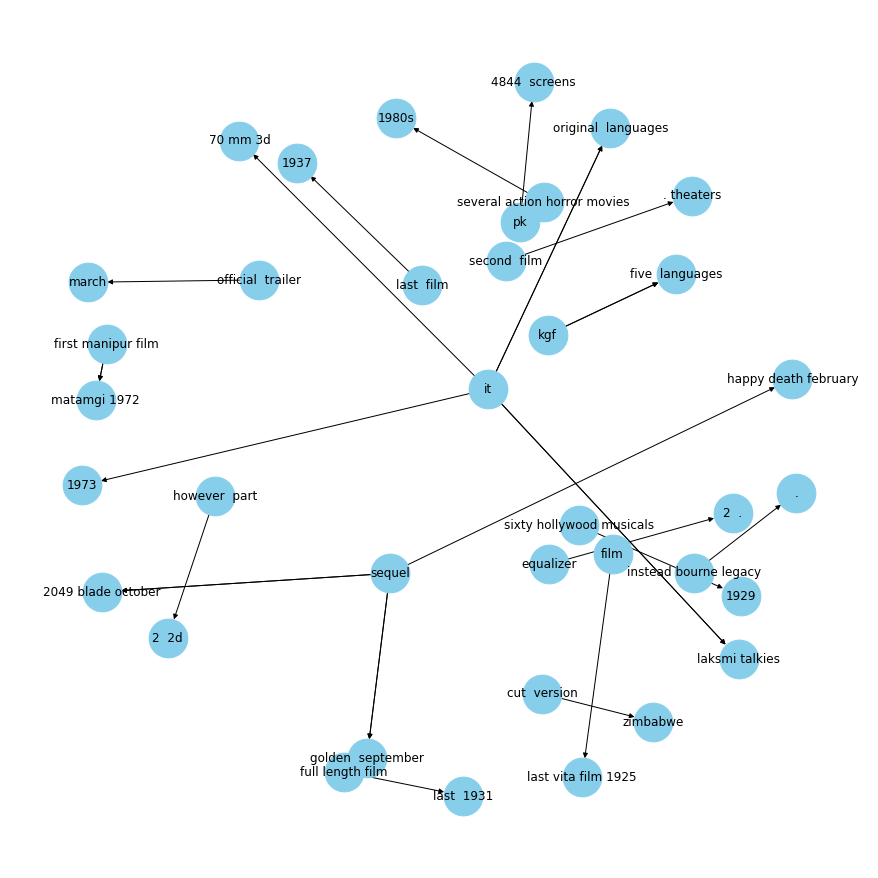

In [19]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

I can see quite a few interesting information in this graph. For example, look at this relationship – “several action horror movies released in the 1980s” and “pk released on 4844 screens”. These are facts and it shows us that we can mine such facts from just text. That’s quite amazing!

End Notes

In this article, we learned how to extract information from a given text in the form of triples and build a knowledge graph from it.

However, we restricted ourselves to use sentences with exactly 2 entities. Even then we were able to build quite informative knowledge graphs. Imagine the potential we have here!